In [1]:
import cv2
import torch
from PIL import Image
import pandas as pd
from datetime import datetime
import os

# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

def count_people(image):
    # Convert image to RGB (in case it's not)
    img = Image.fromarray(image).convert("RGB")
    
    # Perform inference
    results = model(img)

    # Extract results for 'person' class (class index 0 in COCO)
    people_count = (results.xyxy[0][:, -1] == 0).sum().item()
    
    return people_count

def main(video_path, output_pickle_path):
    # Initialize the video capture
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    interval = 10  # interval in seconds
    current_frame = 0

    # DataFrame to store results
    results_df = pd.DataFrame(columns=['datetime', 'people_count'])

    while True:
        # Set frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, current_frame)
        ret, frame = cap.read()

        if not ret:
            break  # Break if cannot retrieve frame

        # Count people in the frame
        people_count = count_people(frame)
        print(people_count)
        # Record the datetime and people count
        new_row = pd.DataFrame({'datetime': [datetime.now()], 'people_count': [people_count]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

        # Serialize DataFrame to pickle after each entry
        results_df.to_pickle(output_pickle_path)

        # Increment to the next frame to capture based on the interval
        current_frame += int(fps * interval)

    cap.release()

if __name__ == '__main__':
    video_path = r'C:\Users\HP\OneDrive\Desktop\finalyear\yolov5\testing\videoplayback.mp4'
    output_pickle_path = r'prophet_input_df.pkl'
    main(video_path, output_pickle_path)

Using cache found in C:\Users\HP/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-14 Python-3.11.5 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


1
0


C:\Users\HP\AppData\Local\Temp\ipykernel_8120\2996974648.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


0
0
0
0
1
1
2
0
0
0
0
1
2
2
5
1
2
1
0
2
1
1
0
0
0
1
0
2
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
2
3
6
5
5
3
3
1
6
4
8
3
10
11
7
6
12
14
13
9
10
7
9
8
11
7
14
13
10
15
10
11
12
13
16
16
12
11
3
7
5
8
7
8
4
6
1
8
11
9
15
10
8
4
4
9
6
8
14
5
10
8
10
6
8
6
12
4
10
7
5
9
7
5
8
6
8
3
6
5
10
9
8
5
6
5
12
7
13
8
7
5
5
6
11
6
8
9
12
8
9
3
5
8
5
12
3
9
4
6
5
7
9
11
16
7
5
10
9
8
7
9
11
7
11
12
12
13
8
8
14
8
10
9
8
13
6
7
11
5
8
9
9
10
7
11
8
6
6
10
5
7
4
10
9
10
1
4
6
7
5
10
9
6
8
3
6
6
5
6
8
4
7
6
6
13
10
4
7
7
4
6
5
10
7
4
8
7
8
8
14
12
8
6
14
9
5
10
5
6
13
14
17
12
6
7
5
7
7
8
9
9
11
16
15
12
14
9
7
10
11
3
8
4
8
8
12
4
8
8
13
8
12
15
19
8
9
8
13
11
12
14
18
8
5
4
4
8
3
10
13
11
13
6
15
8
10
9
15
2
9
10
9
9
15
5
5
1
3
3
10
7
11
13
21
16
10
7
10
6
12
13
16
12
9
9
9
3
8
6
11
8
5
8
12
8
12
7
8
15
7
10
8
11
8
10
15
10
13
17
12
9
13
11
14
7
4
7
5
9
8
4
5
4
5
5
6
8
4
4
6
12
12
6
9
17
6
13
7
7
10
11
7
15
9
8
10
6
8
6
11
9
8
10
7
5
12
3
7
12
9
8
8
12
10
11
14


KeyboardInterrupt: 

In [2]:

# Path to the pickle file
pickle_path = r'prophet_input_df.pkl'  # Replace with your actual file path

# Load the DataFrame from pickle file
df= pd.read_pickle(pickle_path)

# Display the DataFrame
print(df)


                      datetime people_count
0   2024-06-23 16:50:51.724600            1
1   2024-06-23 16:50:51.867331            0
2   2024-06-23 16:50:52.004243            0
3   2024-06-23 16:50:52.140503            0
4   2024-06-23 16:50:52.277902            0
..                         ...          ...
610 2024-06-23 16:52:22.301176            1
611 2024-06-23 16:52:22.445958            3
612 2024-06-23 16:52:22.580150            7
613 2024-06-23 16:52:22.720201           10
614 2024-06-23 16:52:22.867225           12

[615 rows x 2 columns]


In [3]:
!pip install prophet


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
# Rename the columns for Prophet compatibility
df = df.rename(columns={'datetime': 'ds', 'people_count': 'y'})
# Initialize the Prophet model
model = Prophet()

# Fit the model with your DataFrame
model.fit(df)
# Create a DataFrame for future predictions
# Here we specify 20 future intervals; adjust 'periods' as needed
future = model.make_future_dataframe(periods=20, freq='10S')  # '10S' for 10-second intervals

# Make predictions
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(25))
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
plt.show()

c:\Users\HP\OneDrive\Desktop\finalyear\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:52:35 - cmdstanpy - INFO - Chain [1] start processing
16:52:35 - cmdstanpy - INFO - Chain [1] done processing


                            ds       yhat  yhat_lower  yhat_upper
610 2024-06-23 16:52:22.301176   6.903355    1.753157   11.264771
611 2024-06-23 16:52:22.445958   6.890995    2.315156   11.461872
612 2024-06-23 16:52:22.580150   6.879539    2.418108   11.549266
613 2024-06-23 16:52:22.720201   6.867584    2.124189   11.585167
614 2024-06-23 16:52:22.867225   6.855032    1.969875   11.267778
615 2024-06-23 16:52:32.867225   6.001354    1.207623   10.940503
616 2024-06-23 16:52:42.867225   5.147676    0.513734    9.922023
617 2024-06-23 16:52:52.867225   4.293998   -0.548716    8.789772
618 2024-06-23 16:53:02.867225   3.440320   -1.344305    7.979458
619 2024-06-23 16:53:12.867225   2.586641   -2.594866    7.485872
620 2024-06-23 16:53:22.867225   1.732963   -3.285161    6.935609
621 2024-06-23 16:53:32.867225   0.879285   -5.076472    5.964894
622 2024-06-23 16:53:42.867225   0.025607   -5.791966    6.029995
623 2024-06-23 16:53:52.867225  -0.828071   -7.101179    5.458772
624 2024-0

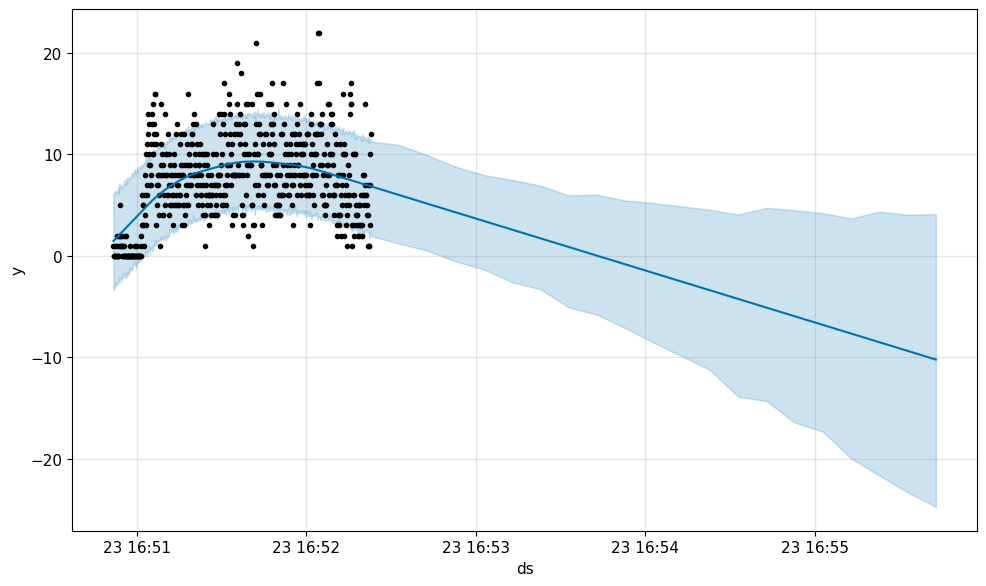

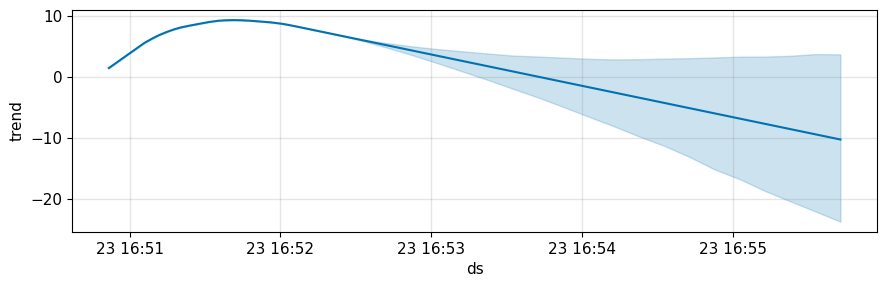

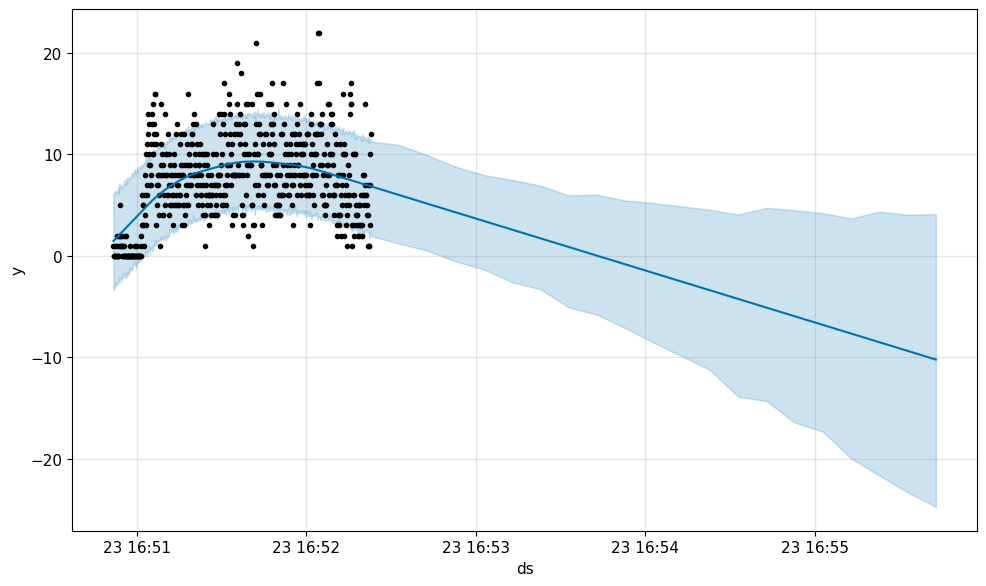

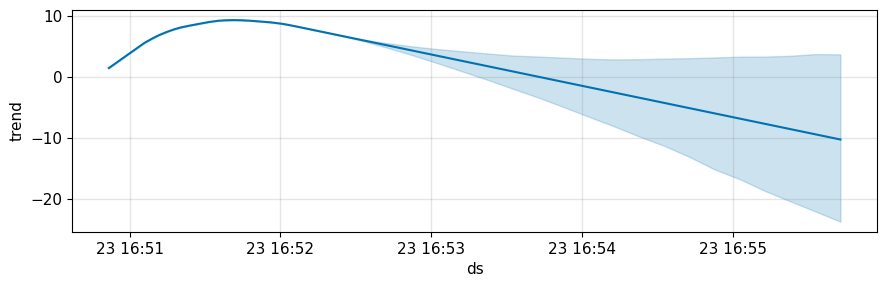

In [5]:
%matplotlib inline

# Plot the forecast
fig1 = model.plot(forecast)

# Plot components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

In [7]:
!pip freeze


asttokens==2.4.1
certifi==2024.6.2
charset-normalizer==3.3.2
cmdstanpy==1.2.3
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
executing==2.0.1
filelock==3.15.1
fonttools==4.53.0
fsspec==2024.6.0
gitdb==4.0.11
GitPython==3.1.43
holidays==0.50
idna==3.7
importlib_resources==6.4.0
intel-openmp==2021.4.0
ipykernel==6.29.4
ipython==8.25.0
jedi==0.19.1
Jinja2==3.1.4
jupyter_client==8.6.2
jupyter_core==5.7.2
kiwisolver==1.4.5
MarkupSafe==2.1.5
matplotlib==3.9.0
matplotlib-inline==0.1.7
mkl==2021.4.0
mpmath==1.3.0
nest-asyncio==1.6.0
networkx==3.3
numpy==1.26.4
opencv-python==4.10.0.82
packaging==24.1
pandas==2.2.2
parso==0.8.4
pillow==10.3.0
platformdirs==4.2.2
prompt_toolkit==3.0.47
prophet==1.1.5
psutil==5.9.8
pure-eval==0.2.2
py-cpuinfo==9.0.0
Pygments==2.18.0
pyparsing==3.1.2
python-dateutil==2.9.0.post0
pytz==2024.1
pywin32==306
PyYAML==6.0.1
pyzmq==26.0.3
requests==2.32.3
scipy==1.13.1
seaborn==0.13.2
six==1.16.0
smmap==5.0.1
stack-data==0.6.3

In [8]:
!pip freeze > requirements.txt
